In [1]:
import numpy as np
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
import random

In [140]:

def make_plot(stem_ls,fft_ls,save_idx=None):
    plt.figure()
    plt.subplot(2, 1,1)
    markerline, stemlines, baseline = plt.stem(stem_ls, markerfmt=" ", use_line_collection=True)
    plt.setp(stemlines, linestyle="-", color="grey", linewidth=0.1)
    stemlines.set_color("gray")
    stemlines.set_linewidth(1)
    baseline.set_color('none')
    markerline.set_color("none")
    plt.subplot(2, 1, 2)

    plt.plot(fft_ls)
    peaks, _ = find_peaks(fft_ls)
    std = np.std(fft_ls)
    plt.title("number of peaks :{}, num of stem : {},std of fft: {}".format(len(peaks),sum(stem_ls),std))
    plt.tight_layout()
    if save_idx:
        plt.savefig(str(save_idx)+".png")

In [141]:

#stem_ls[100] = 1

In [196]:
def make_stem_fft_ls(on_state_stem,b_move = 0): 
    stem_ls =[0] * 1024
    on_state_stem = [x + b_move for x in on_state_stem]
    print(on_state_stem)
    
    for idx in on_state_stem: 
       stem_ls[idx] = 1 
    
    
    
    Yp = np.fft.fft(stem_ls,2**10)
    fft_ls = abs(Yp)[0:len(Yp) // 2]
#     max_fft = max(fft_ls)
#     fft_ls = [x/max_fft for x in fft_ls ]
    return stem_ls,fft_ls

In [197]:

def make_onState_frame(sample_num = 10,sample_range = 200, duplicate = 1, d_range = 200,start_idx = 0, continuity  =0 ):
    rt_stem =[]
    for i in range(duplicate):
        on_state_stem =random.choices(range(start_idx,start_idx+sample_range), k=sample_num-continuity)
        rt_stem.extend(on_state_stem)
        
        continuity_stem = random.choices(range(start_idx,start_idx+sample_range))
        rt_stem.extend(range(continuity_stem[0],continuity_stem[0]+continuity))
        start_idx += d_range
    rt_stem = list(set(rt_stem))
    rt_stem.sort()
    return rt_stem


In [216]:
on_state_stem = make_onState_frame(sample_num = 5,sample_range = 200, duplicate = 1, d_range = 400, start_idx = 0,continuity=10)
print(on_state_stem)
stem_ls,fft_ls = make_stem_fft_ls(on_state_stem)

[57, 58, 59, 60, 61, 62, 63, 64, 65, 66]
[57, 58, 59, 60, 61, 62, 63, 64, 65, 66]


In [217]:
on_state_stem_move = make_onState_frame(sample_num = 10,sample_range = 200, duplicate = 1, d_range = 200, start_idx = 0,continuity=0)
print(on_state_stem_move)
stem_ls_move,fft_ls_move = make_stem_fft_ls(on_state_stem_move)

[22, 24, 32, 55, 77, 122, 124, 136, 156, 196]
[22, 24, 32, 55, 77, 122, 124, 136, 156, 196]


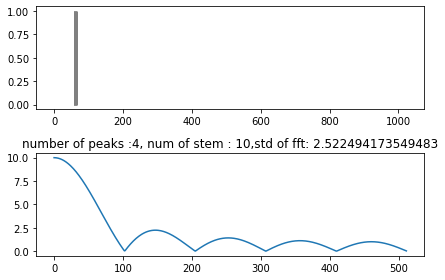

In [218]:
make_plot(stem_ls, fft_ls)


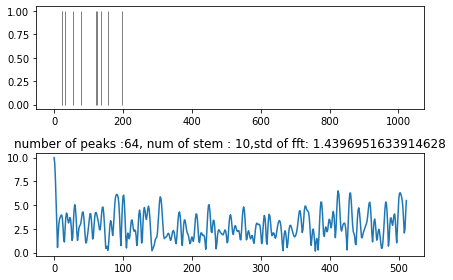

In [219]:
make_plot(stem_ls_move, fft_ls_move)

In [220]:
sum_stem_ls =[]
for x in on_state_stem:
    sum_stem_ls.append(x)
print(len(on_state_stem))
print(len(on_state_stem_move))
for x in on_state_stem_move: 
    sum_stem_ls.append(x)
print(len(sum_stem_ls))
stem_ls_sum,fft_ls_sum = make_stem_fft_ls(sum_stem_ls)

10
10
20
[57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 22, 24, 32, 55, 77, 122, 124, 136, 156, 196]


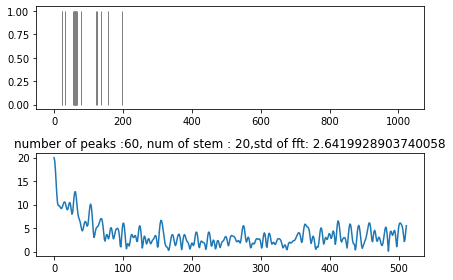

In [221]:
make_plot(stem_ls_sum, fft_ls_sum)

In [222]:
sum_fft_ls = []
for idx in range(len(fft_ls)):
    sum_fft_ls.append(fft_ls[idx]+fft_ls_move[idx])

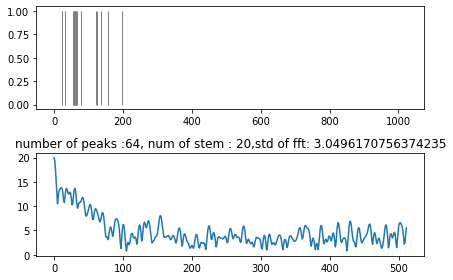

In [223]:
make_plot(stem_ls_sum, sum_fft_ls)

In [118]:
import json
def read_dict(name, folder_name="./"):
    with open(folder_name + '{}.txt'.format(name)) as json_file:
        data = json.load(json_file)
    return data

In [138]:


PATH = "/Users/wangjiahui/wwk_apply/lnl660099/"
AF647_NUP_PFA_FFT_ls_dict = read_dict("PATH_AF647_NUP_PFA_fft_ls", "/Users/wangjiahui/wwk_apply/lnl660099/data/")
AF647_NUP_PFA_stem_ls_dict = read_dict("PATH_AF647_NUP_PFA_stem_dict", "/Users/wangjiahui/wwk_apply/lnl660099/data/")


AF647_NUP_M_FFT_ls_dict = read_dict("PATH_AF647_NUP_M_fft_ls", "/Users/wangjiahui/wwk_apply/lnl660099/data/")
AF647_NUP_M_stem_ls_dict = read_dict("PATH_AF647_NUP_M_stem_dict", "/Users/wangjiahui/wwk_apply/lnl660099/data/")


ATTO_NUP_PFA_FFT_ls_dict =read_dict("PATH_ATTO_NUP_PFA_fft_ls", "/Users/wangjiahui/wwk_apply/lnl660099/data/")
ATTO_NUP_PFA_stem_ls_dict = read_dict("PATH_ATTO_NUP_PFA_stem_dict", "/Users/wangjiahui/wwk_apply/lnl660099/data/")


ATTO_NUP_M_FFT_ls_dict = read_dict("PATH_ATTO_NUP_M_fft_ls", "/Users/wangjiahui/wwk_apply/lnl660099/data/")
ATTO_NUP_M_stem_ls_dict = read_dict("PATH_ATTO_NUP_M_stem_dict", "/Users/wangjiahui/wwk_apply/lnl660099/data/")

In [145]:
def findContinuityPlanes(ls):
    """
    :param List [plane 1 ,plane 2,plane n]
    :return:[plane start,cnt,plane start,cnt]
    """
    ls = sorted(ls)
    dl = [ls[i] - ls[i - 1] for i in range(1, len(ls))]
    dl.append(-1)
    cntLs = []
    cnt = 0
    st = -1
    for idx, x in enumerate(dl):
        if cnt == 0:
            st = ls[idx]
            if x == 1:
                cnt += 1

            else:
                cntLs.extend([st, 1])
        else:
            if x == 1:
                cnt += 1
            else:
                cnt += 1
                cntLs.extend([st, cnt])
                cnt = 0
    return cntLs

In [161]:
def stem_ls2_framels(stem_ls):
    frame_ls =[]
    for idx, x in enumerate(stem_ls): 
        if x ==1: 
            frame_ls.append(idx)
    return frame_ls

In [200]:
def help_funtion(stem_dict,fft_ls_dict,cls = 0): 
    k_ls = []
    num_on_ls =[] 
    peak_ls =[] 
    q_num_ls = [] 
    std_ls = []
    dv_ls = []
    max_on_duration_ls=[]
    cls_ls = [cls] * len(stem_dict)
    for k,v in stem_dict.items():
        k_ls.append(k)
        stem_ls = stem_dict[k]
        frame_ls = stem_ls2_framels(stem_ls)
        cnt_ls = findContinuityPlanes(frame_ls)
        on_duration = max(cnt_ls[1::2])
        max_on_duration_ls.append(on_duration)
        #print(len(cnt_ls))
        num_on_ls.append(sum(stem_ls))
        fft_data = fft_ls_dict[k]
        peaks, _ = find_peaks(fft_data)
        peak_ls.append(len(peaks))
        q_num = len(peaks)/sum(stem_ls)
        q_num_ls.append(q_num)
        std = np.std(fft_data)
        std_ls.append(std)
        dv_ls.append(len(peaks) * len(cnt_ls)/ std)
    rt_data = np.array([peak_ls,std_ls,num_on_ls,q_num_ls,max_on_duration_ls,dv_ls])
    return rt_data.T,k_ls

In [201]:
rt_data1,kl_1 = help_funtion(AF647_NUP_M_stem_ls_dict,AF647_NUP_M_FFT_ls_dict,0)

In [242]:
rt_data2,kl_2= help_funtion(ATTO_NUP_M_stem_ls_dict,ATTO_NUP_M_FFT_ls_dict,1)

In [243]:
print(rt_data2.shape)
rt_data2=rt_data2[rt_data2[:,-2] < 25]
print(rt_data2.shape)
rt_data2= rt_data2[rt_data2[:,-1] > 100]
print(rt_data2.shape)
rt_data2 = rt_data2[rt_data2[:,0] > 30]
print(rt_data2.shape)

(2422, 6)
(2405, 6)
(1499, 6)
(697, 6)


In [202]:
rt_data1.shape

(3918, 6)

In [237]:
sub_data_f1=rt_data1[rt_data1[:,-2]< 25]

In [238]:
sub_data2 = sub_data_f1[sub_data_f1[:,-1] >100]

In [239]:
sub_data3 = sub_data2[sub_data2[:,0] > 30]

In [240]:
sub_data3.shape

(76, 6)

/Users/wangjiahui/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


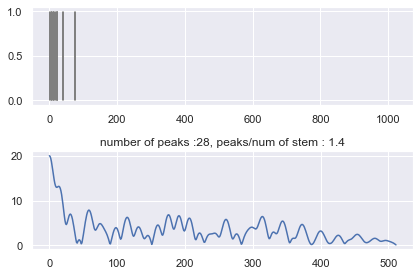

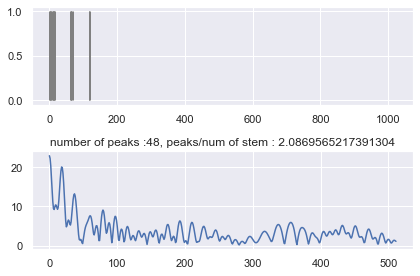

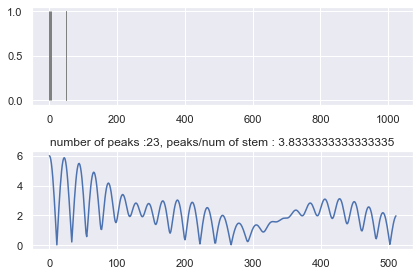

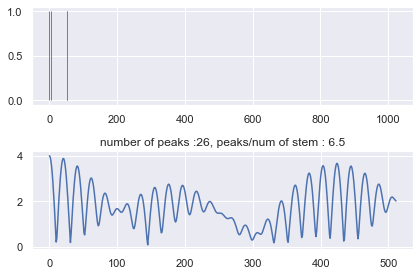

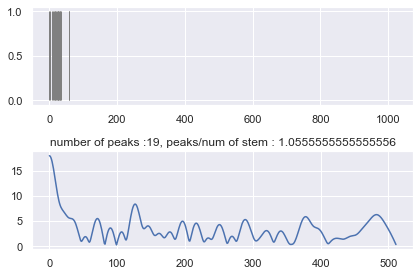

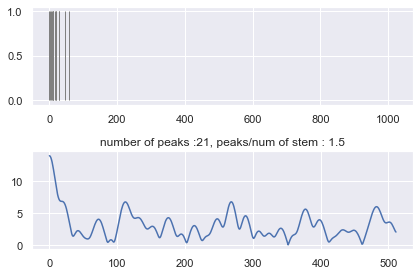

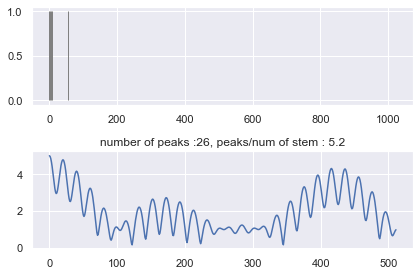

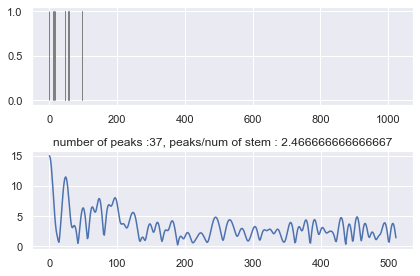

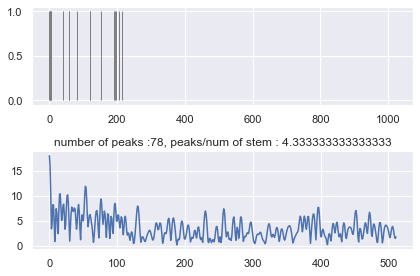

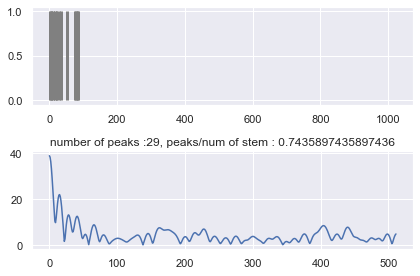

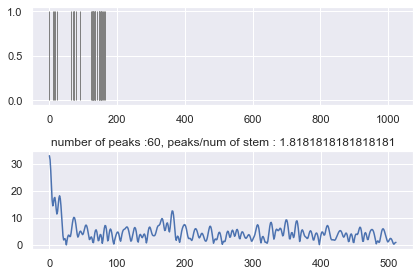

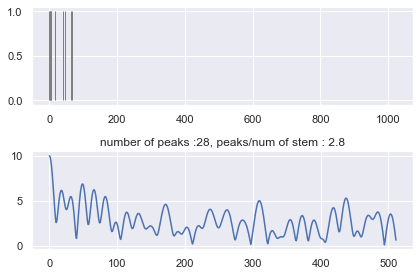

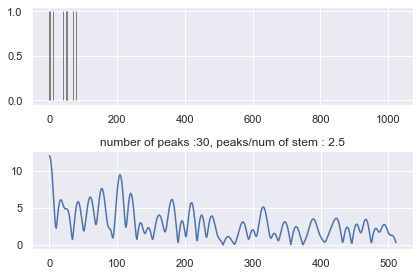

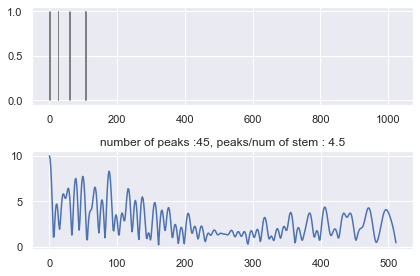

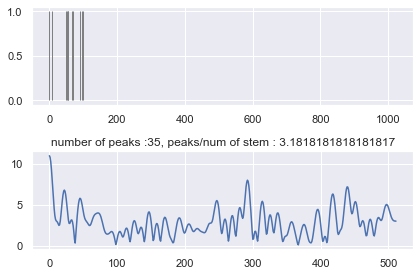

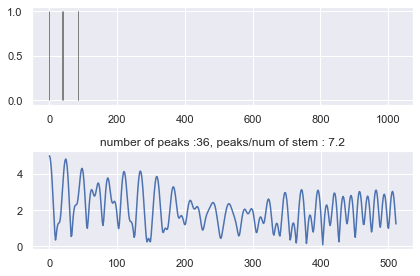

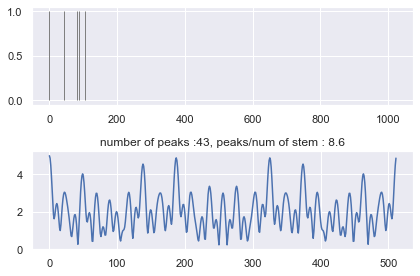

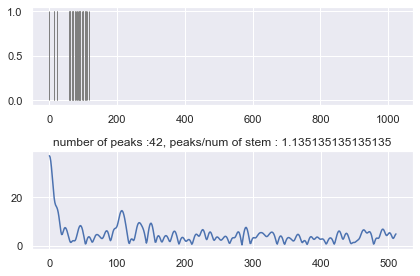

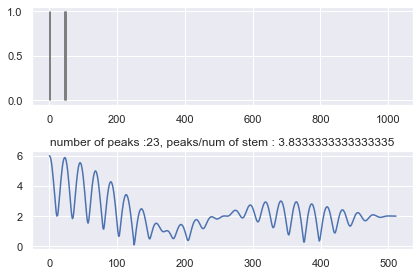

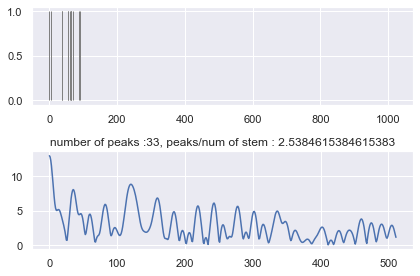

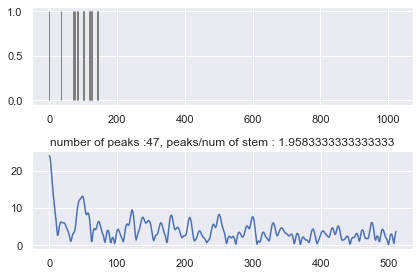

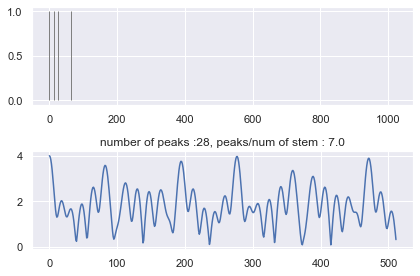

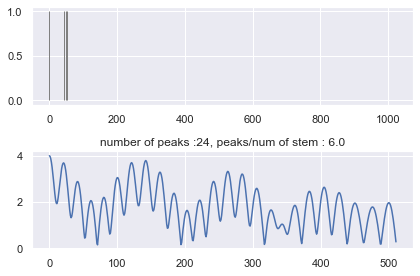

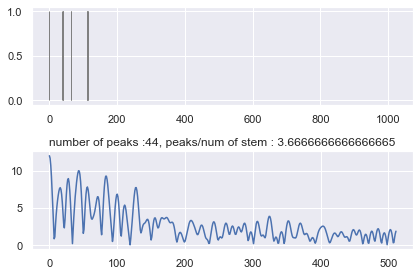

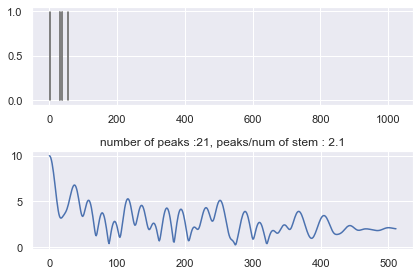

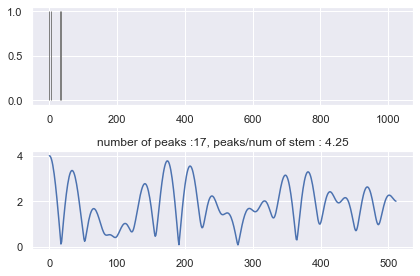

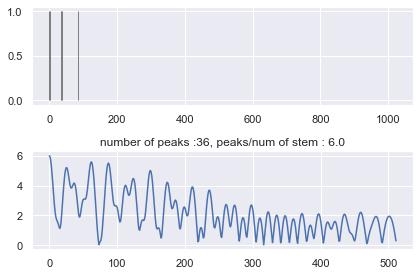

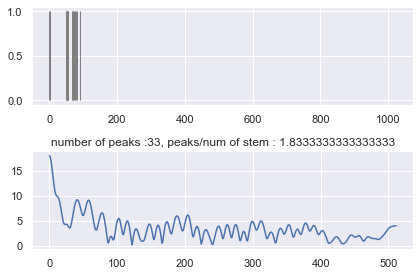

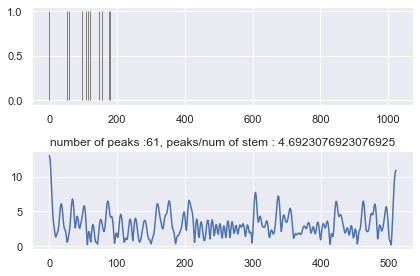

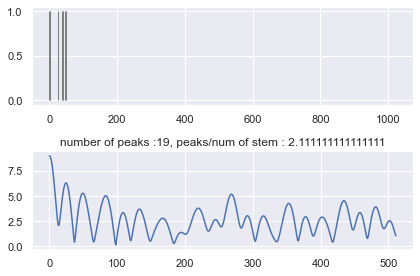

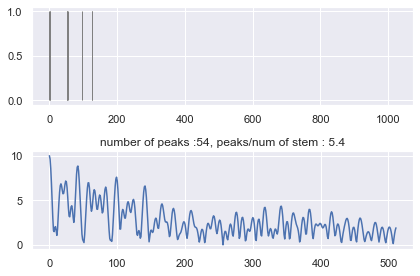

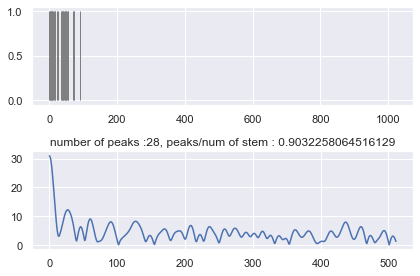

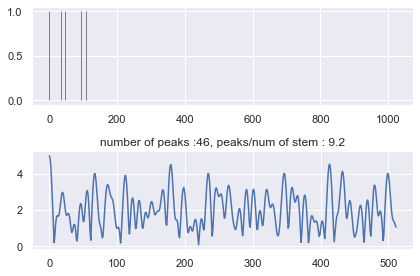

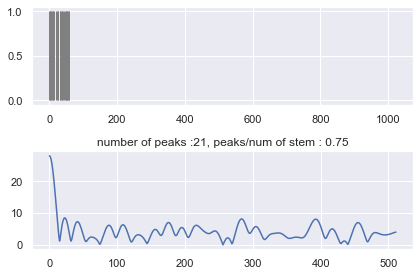

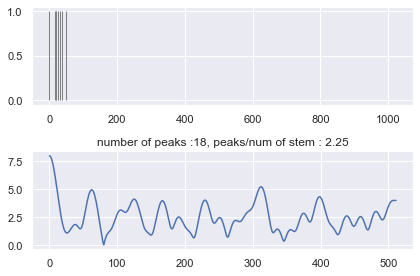

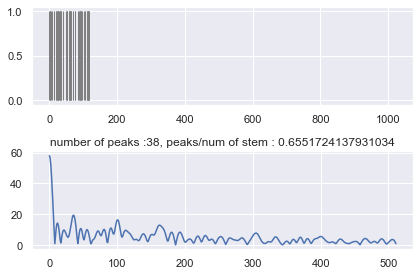

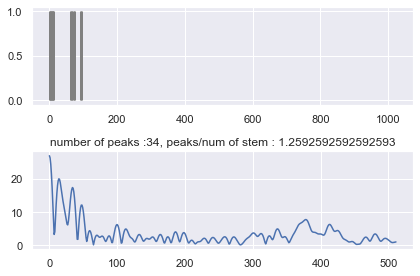

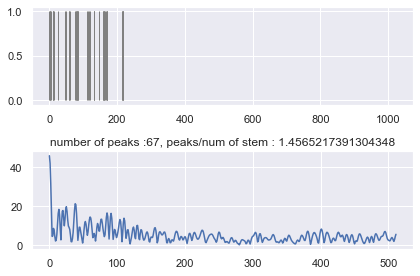

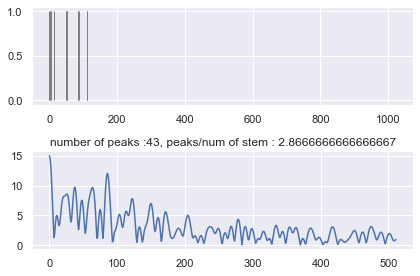

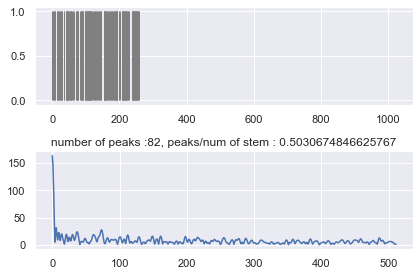

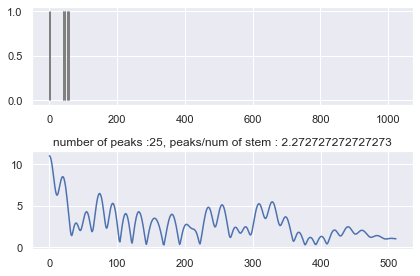

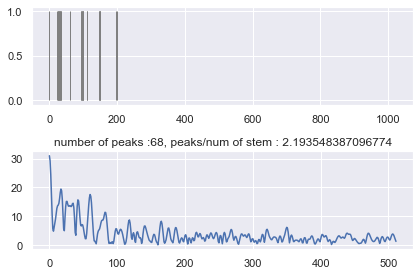

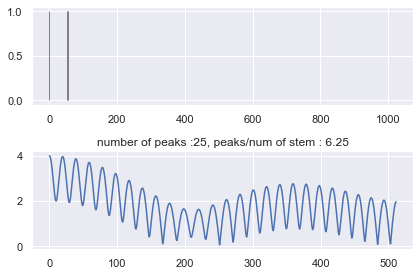

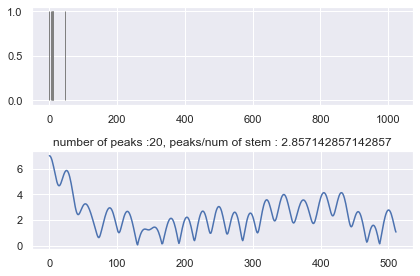

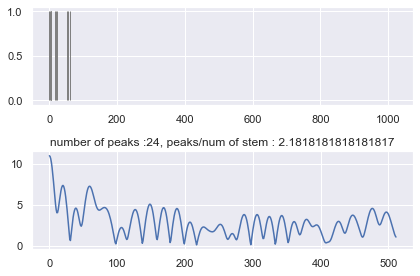

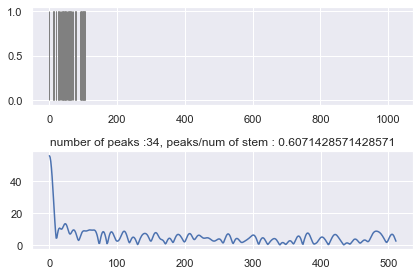

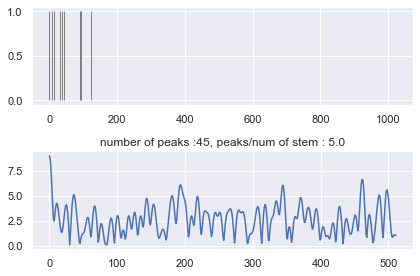

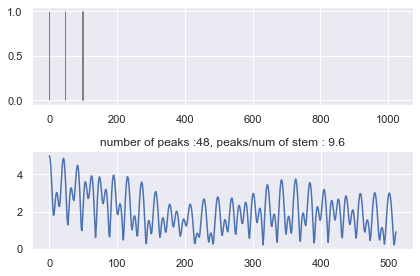

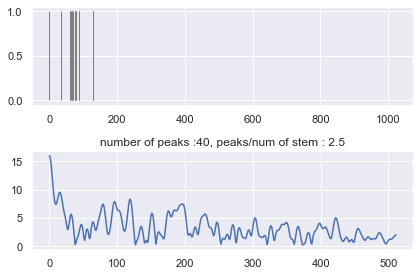

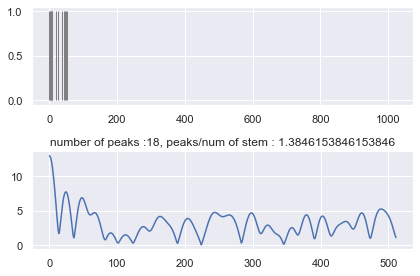

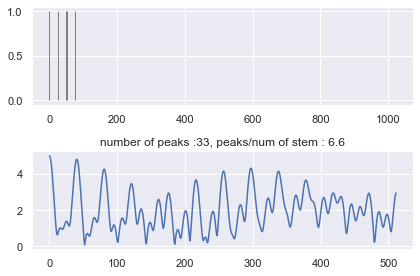

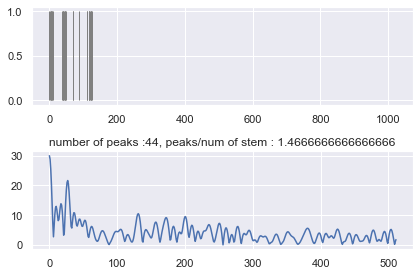

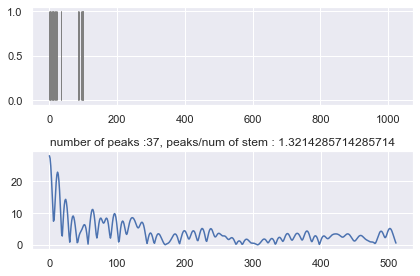

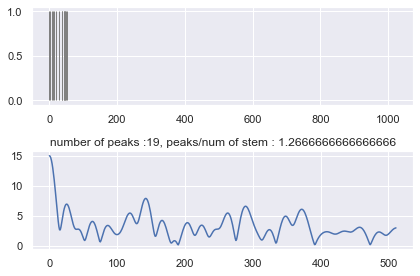

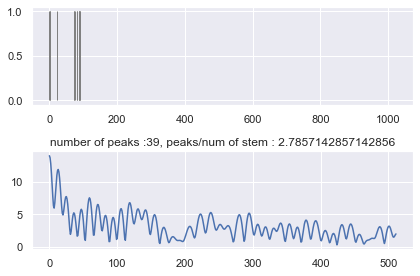

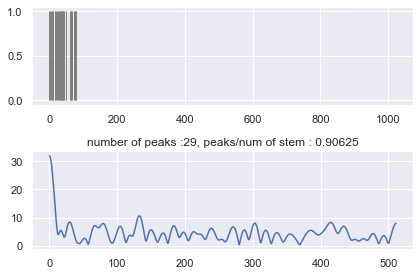

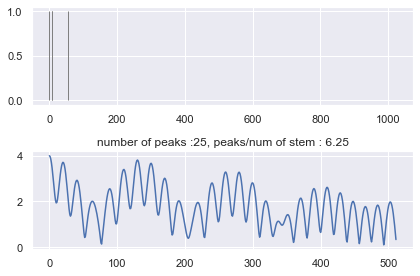

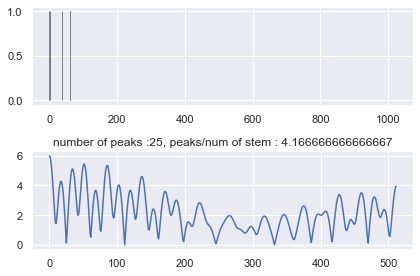

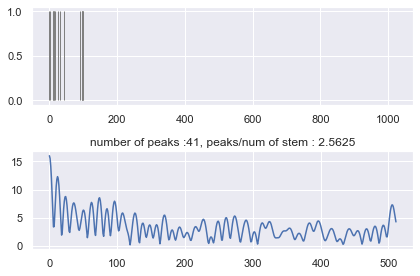

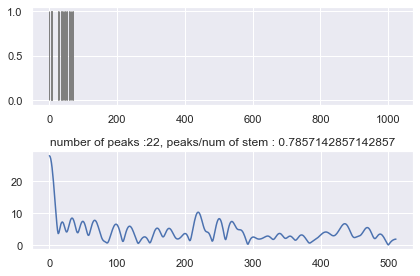

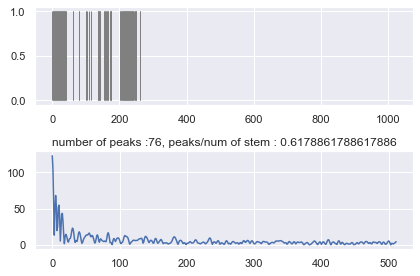

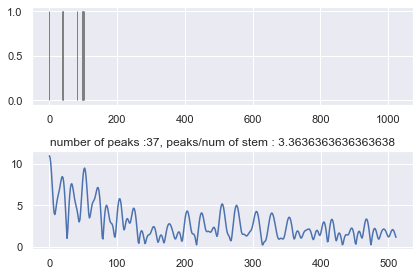

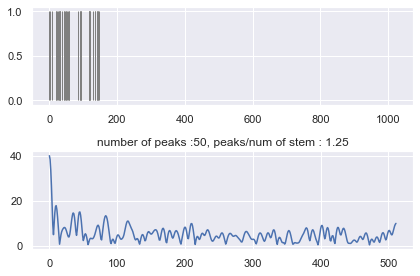

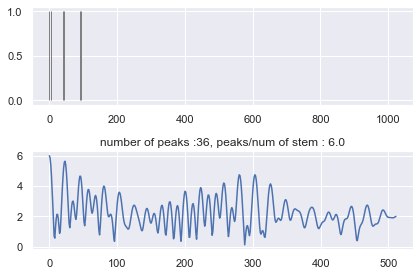

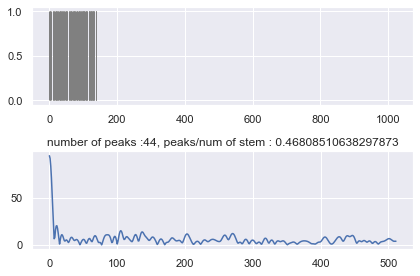

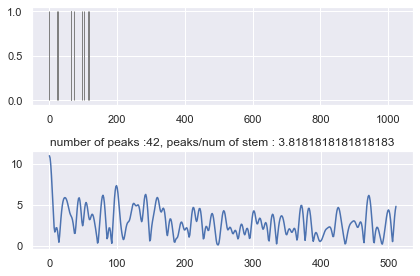

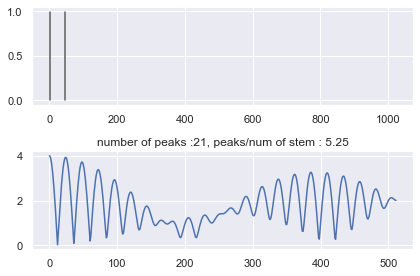

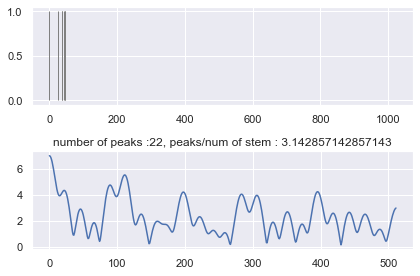

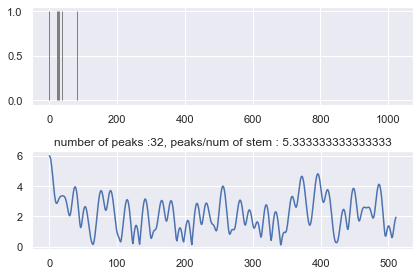

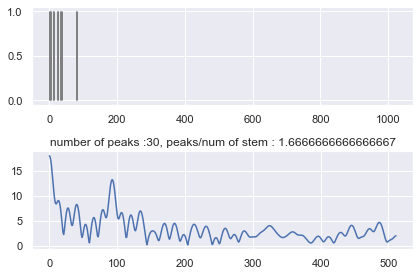

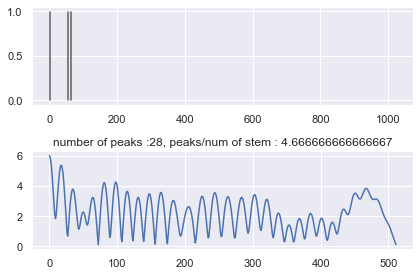

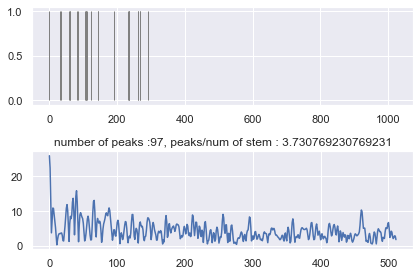

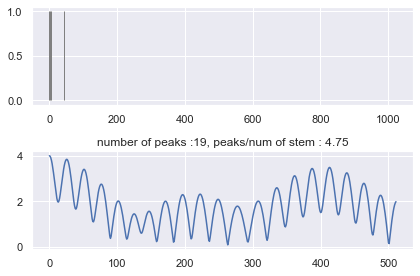

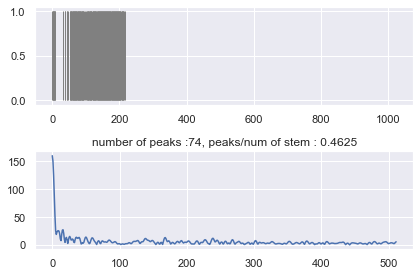

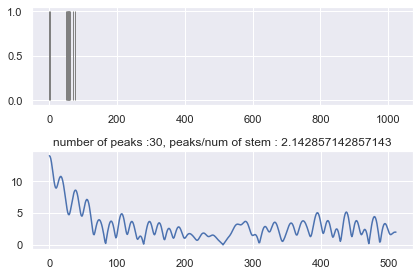

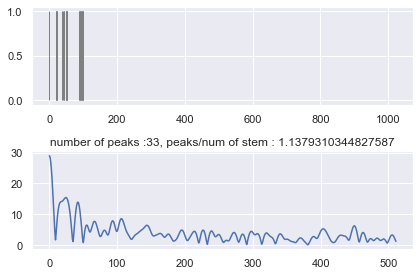

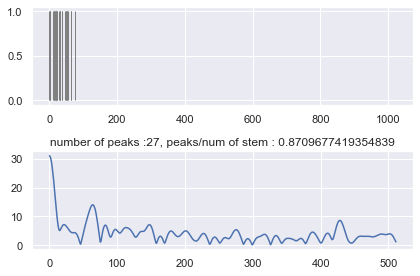

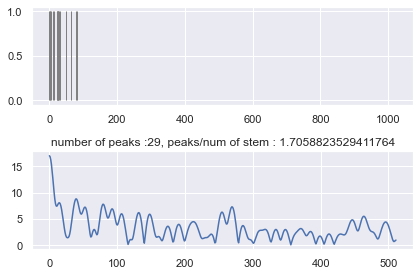

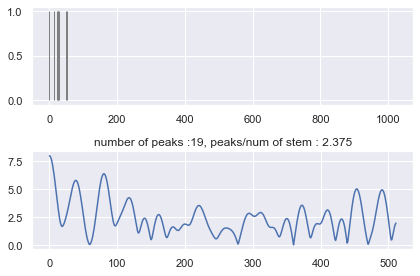

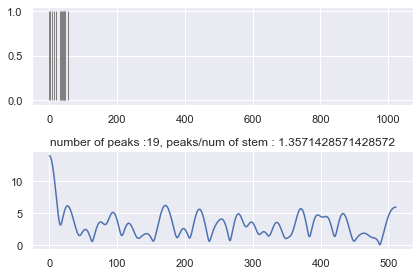

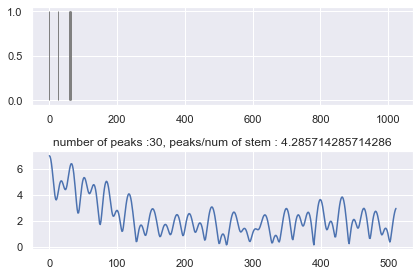

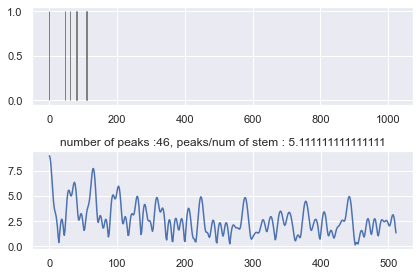

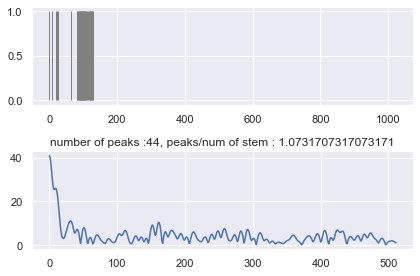

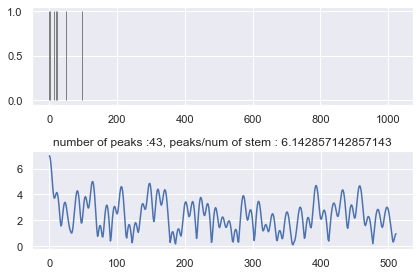

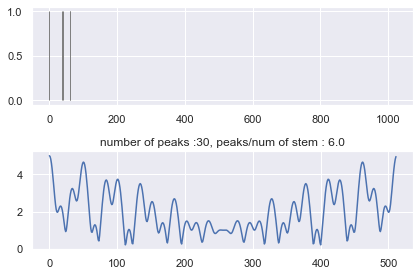

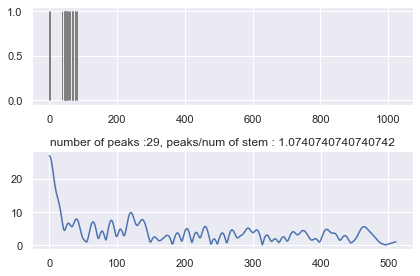

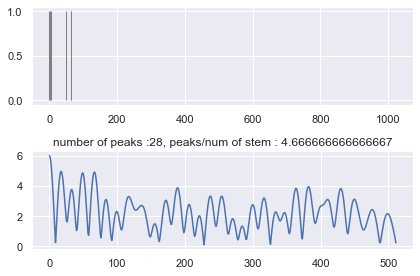

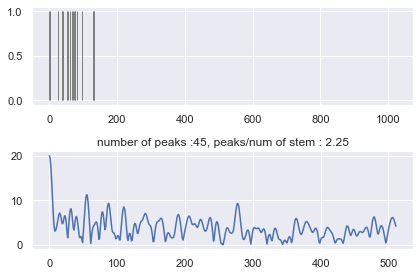

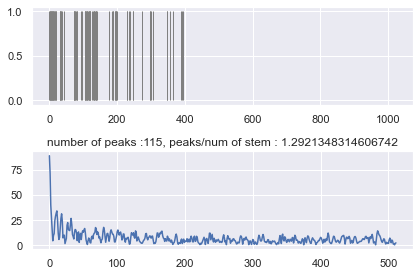

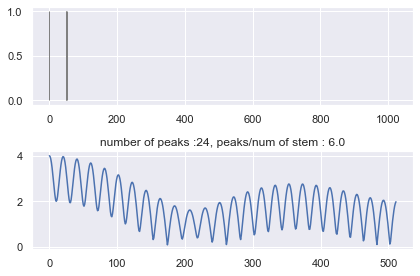

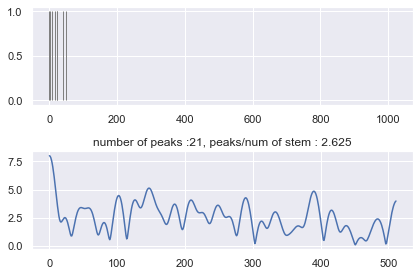

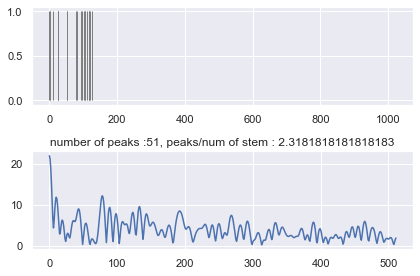

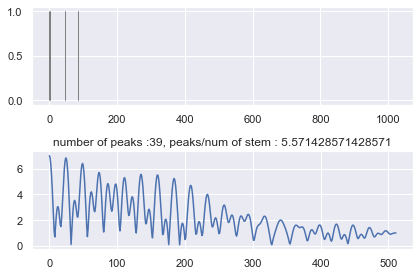

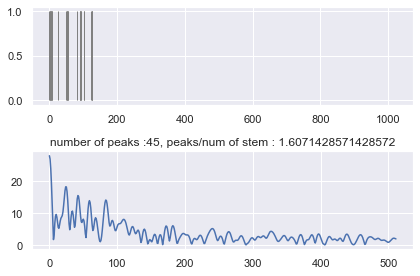

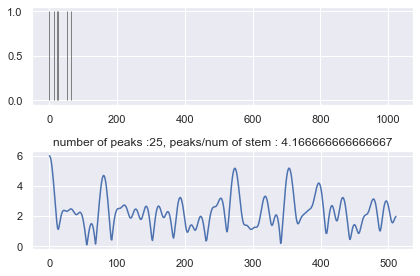

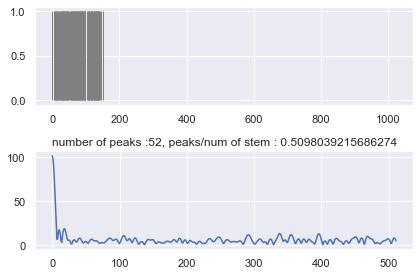

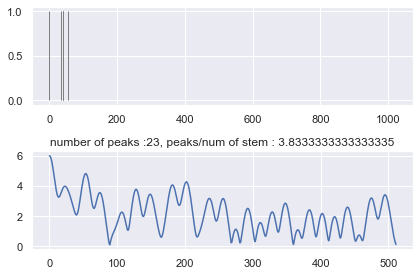

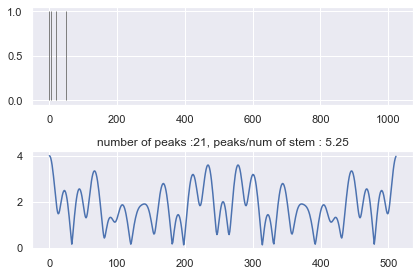

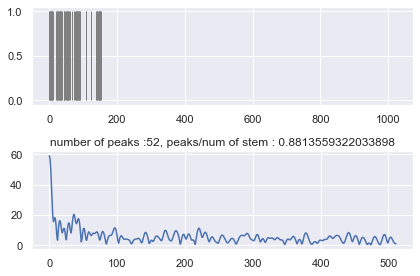

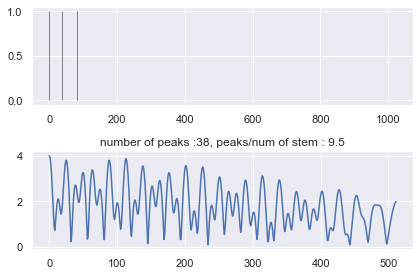

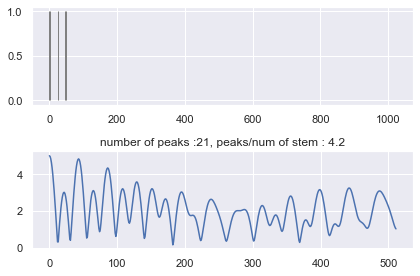

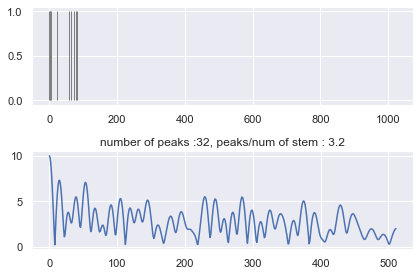

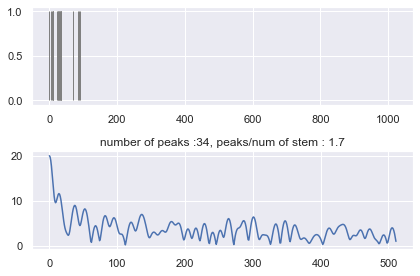

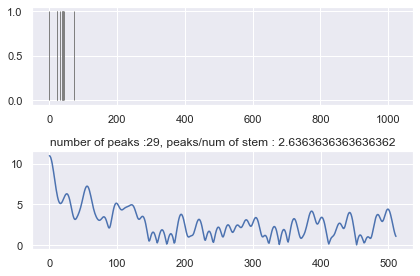

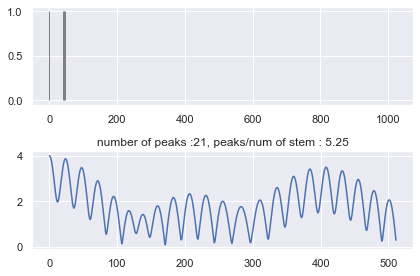

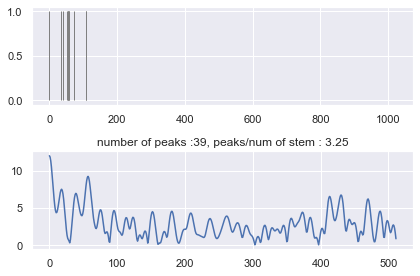

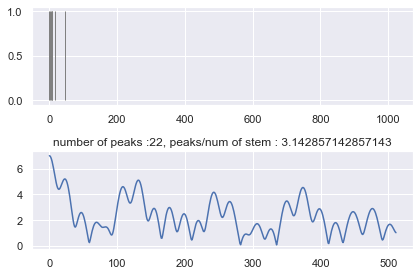

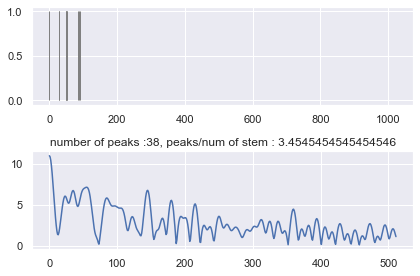

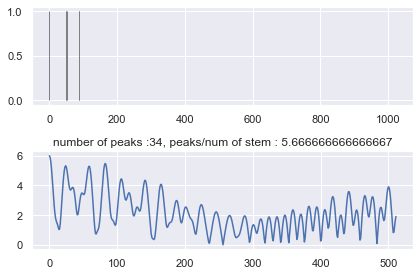

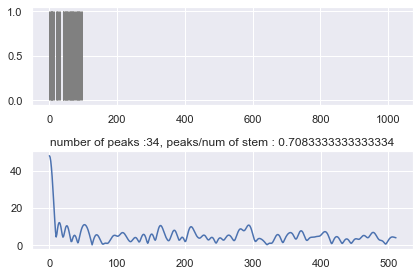

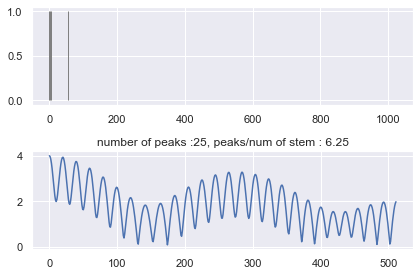

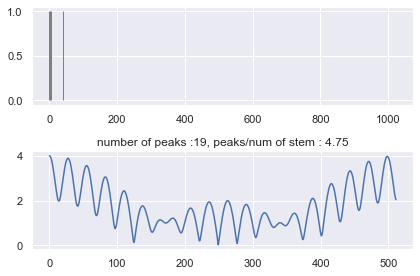

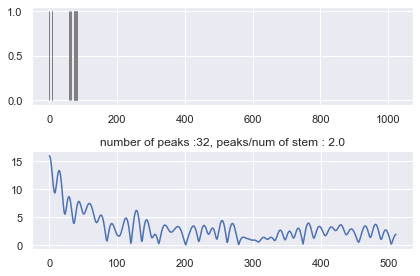

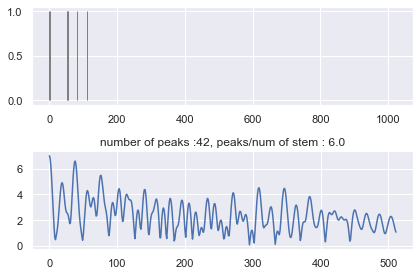

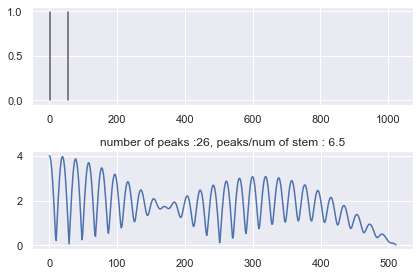

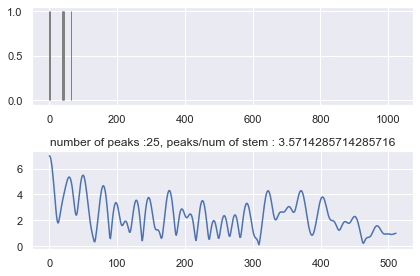

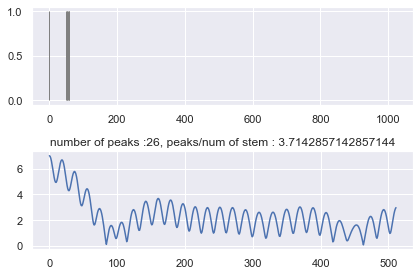

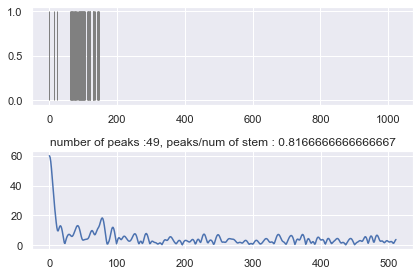

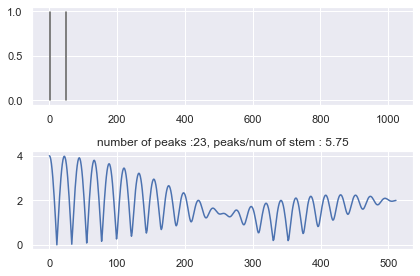

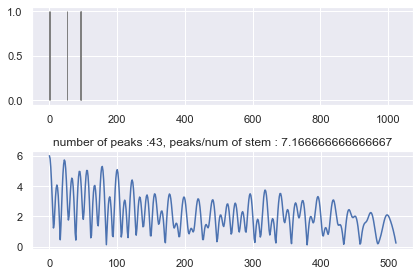

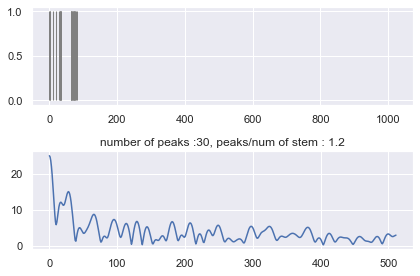

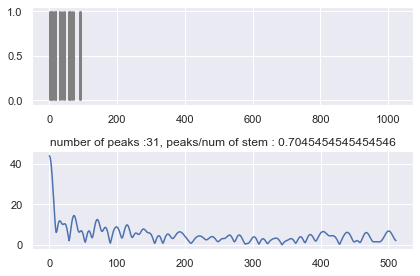

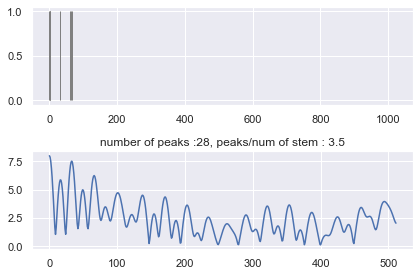

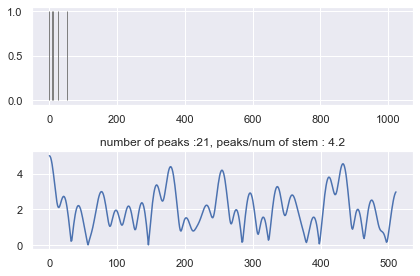

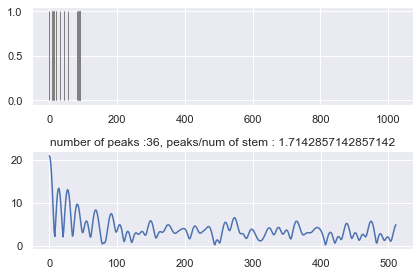

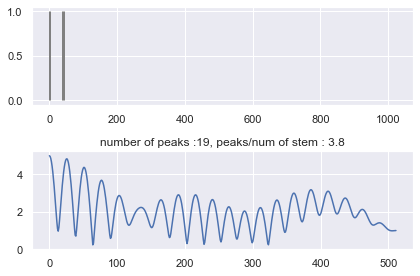

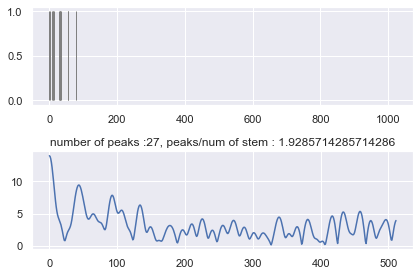

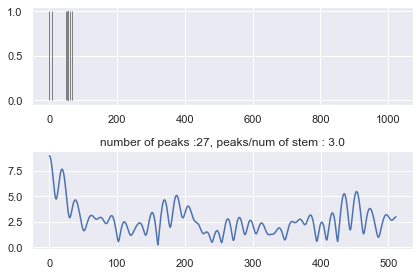

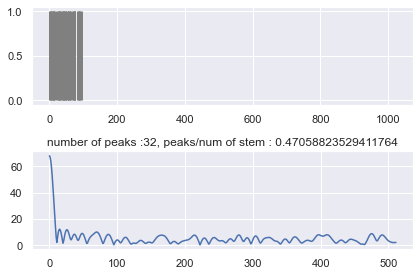

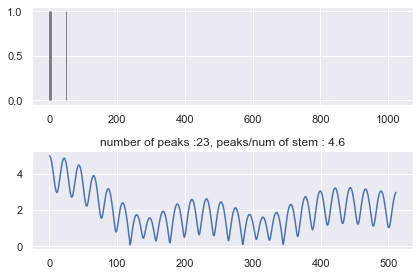

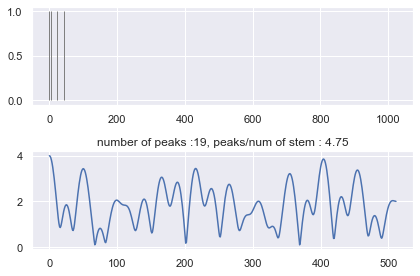

In [188]:
for idx,k in enumerate(kl_1): 
    if rt_data1[idx,-1] > 150: 
        stem_ls=AF647_NUP_M_stem_ls_dict[k]
        fft_ls=AF647_NUP_M_FFT_ls_dict[k]
        make_plot(stem_ls, fft_ls,idx)
        

In [204]:
sub_data.shape

(131, 6)

In [206]:
subdata=sub_data[sub_data[:,0] > 50]

In [209]:
subdata[:,-2]

array([ 6.,  4.,  1.,  4.,  8., 19., 11., 42.,  4., 42., 14.,  4., 11.,
        9.])

In [227]:
rt_data2.shape

(2422, 6)

(array([1.981e+03, 5.610e+02, 3.170e+02, 2.030e+02, 1.390e+02, 1.020e+02,
        7.800e+01, 5.700e+01, 3.800e+01, 4.100e+01, 3.100e+01, 2.900e+01,
        2.200e+01, 2.700e+01, 3.200e+01, 1.400e+01, 1.600e+01, 2.300e+01,
        1.400e+01, 1.200e+01, 1.300e+01, 1.100e+01, 7.000e+00, 7.000e+00,
        1.000e+01, 4.000e+00, 7.000e+00, 1.000e+01, 9.000e+00, 1.000e+01,
        4.000e+00, 3.000e+00, 7.000e+00, 1.000e+01, 3.000e+00, 3.000e+00,
        4.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 3.000e+00, 0.000e+00,
        1.000e+00, 2.000e+00, 3.000e+00, 5.000e+00, 3.000e+00, 0.000e+00,
        1.000e+00, 3.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 1.000e+00,
        2.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 1.000e+0

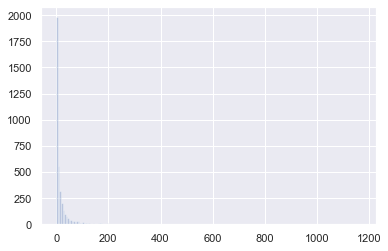

In [177]:
plt.hist(rt_data1[:,-1],bins=200,alpha = 0.3)


(array([753., 496., 324., 239., 157., 120.,  73.,  61.,  33.,  22.,  31.,
         16.,   6.,  13.,  11.,   7.,   8.,   3.,   5.,   3.,   4.,   8.,
          3.,   6.,   2.,   2.,   3.,   3.,   1.,   1.,   1.,   1.,   1.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,   1.,   0.,
          0.,   1.,   0.,   0.,   0.,   1.]),
 array([1.31482145e+00, 7.88355546e+01, 1.56356288e+02, 2.33877021e+02,
        3.11397754e+02, 3.88918487e+02, 4.66439220e+02, 5.43959954e+02,
        6.21480687e+02, 6.99001420e+02, 7.76522153e+02, 8.54042886e+02,
        9.31563619e+02, 1.00908435e+03, 1.08660509e+03, 1.16412582e+03,
        1.24164655e+03, 1.31916729e+03, 1.39668802e+03, 1.47420875e+03,
        1.55172948e+03, 1.62925022e+03, 1.70677095e+03, 1.78429168e+03,
        1.86181242e+03, 1.93933315e+03, 2.01685388e+03, 2.09437462e+03,
        2.17189535e+03, 2.24941608e+03, 2.32693682e+03, 2.40445755e+03,
        2.48197828e+03, 2.55949902e+03, 2.63701975e+03, 2.71454048e+03,
        2.

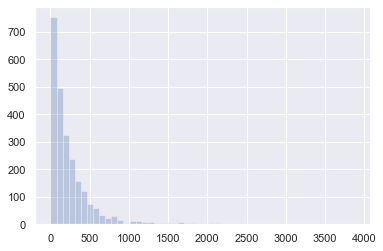

In [178]:
plt.hist(rt_data2[:,-1],bins=50,alpha = 0.3)

In [172]:
from matplotlib.ticker import PercentFormatter
def make_single_data_box(data_ls, title,i,lim=[],save_path="./"):

    fig, axes = plt.subplots(1, 1, figsize=(10, 10))
    for data in data_ls:
        axes.hist(data,bins = 50,alpha = 0.3,weights = np.ones(len(data)) / len(data))

    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    if lim:
        axes.set_xlim(lim)
    plt.show()
    plt.title(title)
    #plt.savefig(save_path+title+str(i)+".png")
    plt.close()

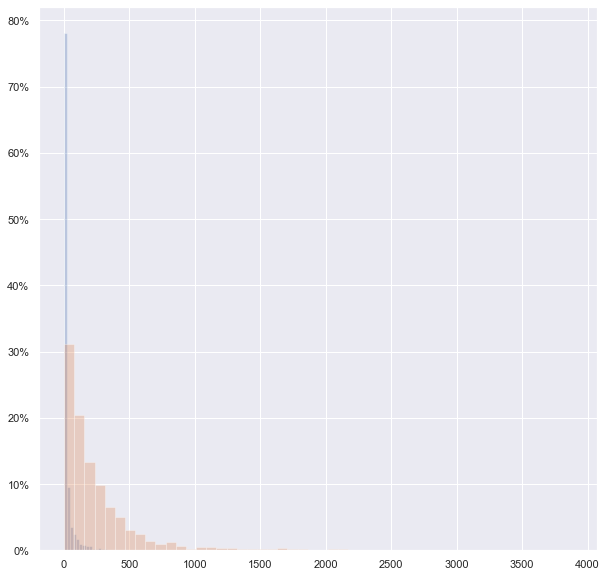

In [174]:
make_single_data_box([rt_data1[:,-1],rt_data2[:,-1]],"",0)

In [179]:
data1 = rt_data1[:,-1].tolist()
data2 = rt_data2[:,-1].tolist()



In [180]:
cnt =0
for x in data1 : 
    if x < 10: 
      cnt +=1 
print(cnt)
print(cnt/len(data1))

2306
0.588565594691169


In [181]:
cnt =0
for x in data2 : 
    if x < 10: 
      cnt +=1 
print(cnt)
print(cnt/len(data2))

110
0.04541701073492981


In [186]:
cnt =0
for x in data1 : 
    if x > 150: 
      cnt +=1 
print(cnt)
print(cnt/len(data1))

131
0.033435426237876466


In [187]:
cnt =0
for x in data2 : 
    if x > 150: 
      cnt +=1 
print(cnt)
print(cnt/len(data2))

1198
0.49463253509496286


In [318]:
digits = np.concatenate([rt_data1,rt_data2])

In [319]:
digits.shape

(6340, 5)

In [324]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold, datasets
#Prepare the data

X, y = digits[:,:4], digits[:,4]
n_samples, n_features = X.shape


X_tsne = manifold.TSNE(n_components=2, init="random").fit_transform(X)



<AxesSubplot:xlabel='Feature_1', ylabel='Feature_2'>

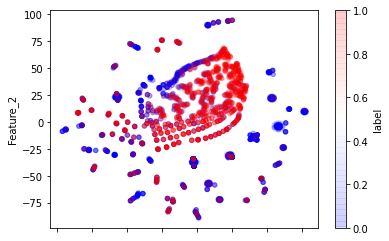

In [325]:
import pandas

df = pandas.DataFrame(dict(Feature_1=X_tsne[:,0], Feature_2=X_tsne[:,1], label=y))

df.plot(x="Feature_1", y="Feature_2", kind='scatter', c='label',alpha = 0.1, cmap="bwr")

In [326]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
reduced_data = PCA(n_components=2).fit_transform(digits[:,:4])

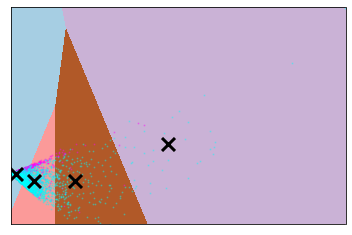

In [327]:
kmeans = KMeans(init="k-means++", n_clusters=4, n_init=2)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect="auto", origin="lower")
plt.scatter(reduced_data[:3918, 0], reduced_data[:3918, 1],alpha = 0.3,color ="magenta", s= 1)

plt.scatter(reduced_data[3918:, 0], reduced_data[3918:, 1],alpha = 0.3,color = "cyan",s = 1)
#plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3,
            color="k", zorder=10)
# plt.title("K-means clustering on the digits dataset (PCA-reduced data)\n"
#           "Centroids are marked with white cross")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [253]:
q1_ls=list(range(2,42,4))
print(q1_ls)
print(len(q1_ls))

[2, 6, 10, 14, 18, 22, 26, 30, 34, 38]
10


In [254]:
q2_ls=list(range(10,210,20))
print(q2_ls)
print(len(q2_ls))

[10, 30, 50, 70, 90, 110, 130, 150, 170, 190]
10
